In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from Bio import Phylo, AlignIO,SeqIO
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
%matplotlib inline

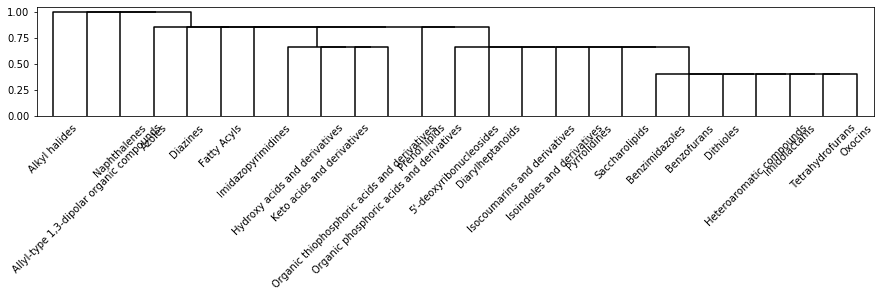

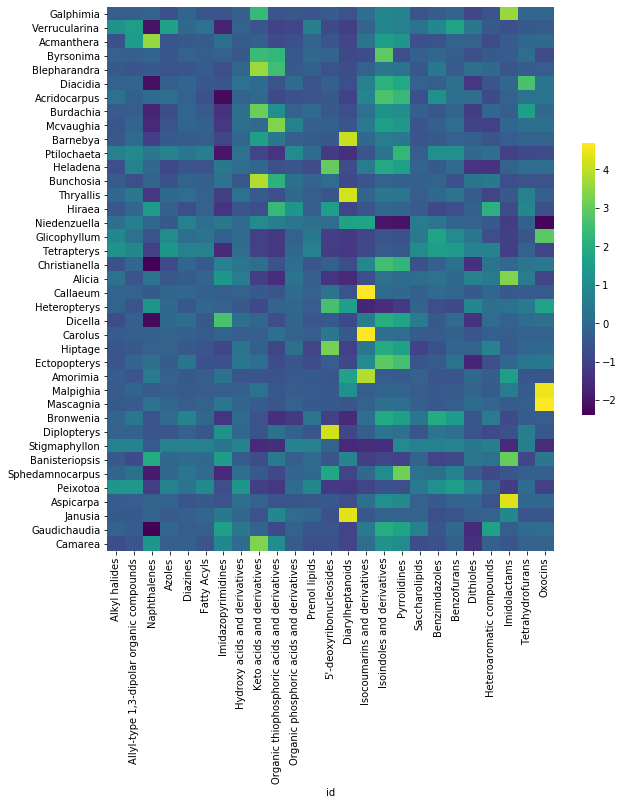

In [2]:
######CLASS_NEG, ANOVA, GENERA
# Class taxonomy obtained from CANOPUS; Keeping only clases statistically relevant; Grouping samples by genera.

df_phylogeny = pd.read_csv('/Users/helenarusso/Documents/UNESP/Doutorado/UCSD/Malpighiaceae_AllSamples/Qemistree.nosync/Files_for_running_Qemistree/Subsequent analyses/Heatmaps/Phylogeny_Malpigh/order_heatmap_phylogeny_malpigh_genera.txt', sep='\t')
labels_phylogeny = list(df_phylogeny['Species'])

canopus = pd.read_csv('/Users/helenarusso/Documents/UNESP/Doutorado/UCSD/Malpighiaceae_AllSamples/Qemistree.nosync/Files_for_running_Qemistree/Subsequent analyses/Heatmaps/NEG/class/classlist_class_NEG_ANOVA.txt', sep='\t', index_col=[0])
canopus = canopus.drop(['unclassified'], 0)
Y_neg = linkage(canopus, metric='jaccard')

fig, axes_canopus = plt.subplots(1, 1, figsize=(15, 2))
dendrogram(Y_neg, orientation="top", 
           labels=canopus.index, color_threshold=0, above_threshold_color='k')

labels_canopus = [i.get_text() for i in axes_canopus.get_xticklabels()]

df = pd.read_csv ('/Users/helenarusso/Documents/UNESP/Doutorado/UCSD/Malpighiaceae_AllSamples/Qemistree.nosync/Files_for_running_Qemistree/Subsequent analyses/Heatmaps/NEG/class/featuretable_updated_class_cutoff1000_genera_ANOVA.txt', sep='\t', index_col=[0])
df = df.drop(['unclassified'], 0)
df = df.reindex(labels_canopus)
df = df[labels_phylogeny]
df = df.T

df_norm_column = df.apply(lambda x: (x-x.mean())/x.std(), axis = 0)
df_norm_column_row_neg = df_norm_column.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df_norm_column_row_neg,
            cmap = 'viridis',
            cbar_kws={'shrink':0.5})

plt.show()


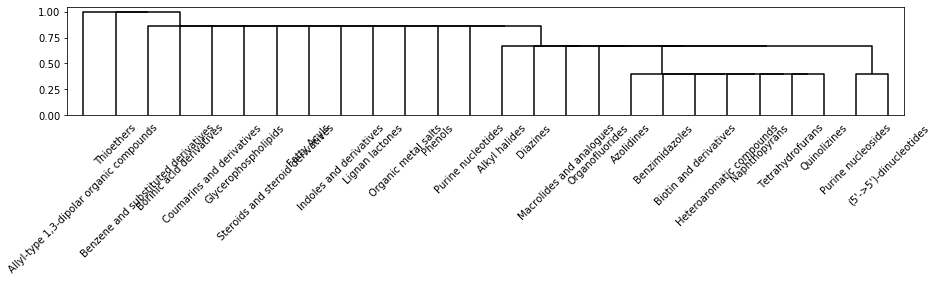

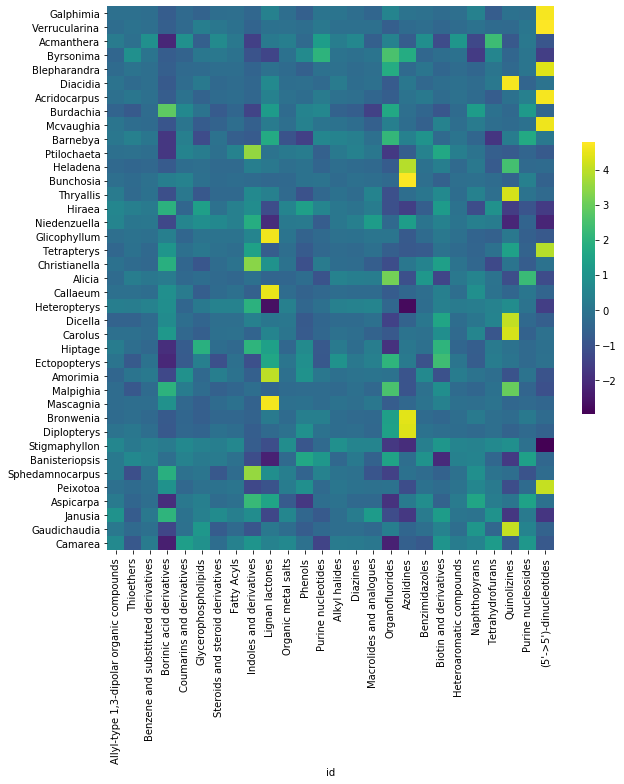

In [3]:
######CLASS_POS, ANOVA, GENERA
# Class taxonomy obtained from CANOPUS; Keeping only clases statistically relevant; Grouping samples by genera.
# Positive ionization mode

df_phylogeny = pd.read_csv('/Users/helenarusso/Documents/UNESP/Doutorado/UCSD/Malpighiaceae_AllSamples/Qemistree.nosync/Files_for_running_Qemistree/Subsequent analyses/Heatmaps/Phylogeny_Malpigh/order_heatmap_phylogeny_malpigh_genera.txt', sep='\t')
labels_phylogeny = list(df_phylogeny['Species'])

canopus = pd.read_csv('/Users/helenarusso/Documents/UNESP/Doutorado/UCSD/Malpighiaceae_AllSamples/Qemistree.nosync/Files_for_running_Qemistree/Subsequent analyses/Heatmaps/POS/class/consider/classlist_class_POS_ANOVA.txt', sep='\t', index_col=[0])
Y_pos = linkage(canopus, metric='jaccard')

fig, axes_canopus = plt.subplots(1, 1, figsize=(15, 2))
dendrogram(Y_pos, orientation="top", 
           labels=canopus.index, color_threshold=0, above_threshold_color='k')

labels_canopus = [i.get_text() for i in axes_canopus.get_xticklabels()]

df = pd.read_csv ('/Users/helenarusso/Documents/UNESP/Doutorado/UCSD/Malpighiaceae_AllSamples/Qemistree.nosync/Files_for_running_Qemistree/Subsequent analyses/Heatmaps/POS/class/consider/featuretable_updated_class_POS_cutoff1000_genera_ANOVA.txt', sep='\t', index_col=[0])
df = df.reindex(labels_canopus)
df = df[labels_phylogeny]
df = df.T

df_norm_column = df.apply(lambda x: (x-x.mean())/x.std(), axis = 0)
df_norm_column_row_pos = df_norm_column.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df_norm_column_row_pos,
            cmap = 'viridis',
            cbar_kws={'shrink':0.5})

plt.show()


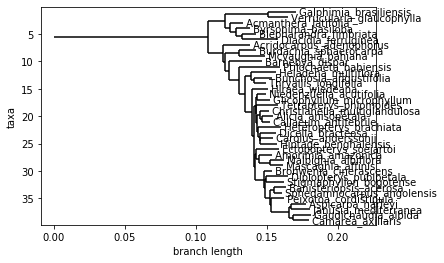

In [4]:
### We must build the cladogram in the right order:

tree = Phylo.read("/Users/helenarusso/Documents/UNESP/Doutorado/UCSD/Malpighiaceae_AllSamples/Qemistree.nosync/Files_for_running_Qemistree/Subsequent analyses/Heatmaps/Phylogeny_Malpigh/phylogeny_malpigh_genera_newick.txt", "newick")

Phylo.draw(tree)

/Users/helenarusso/opt/miniconda3/envs/qiime2-2020.2/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


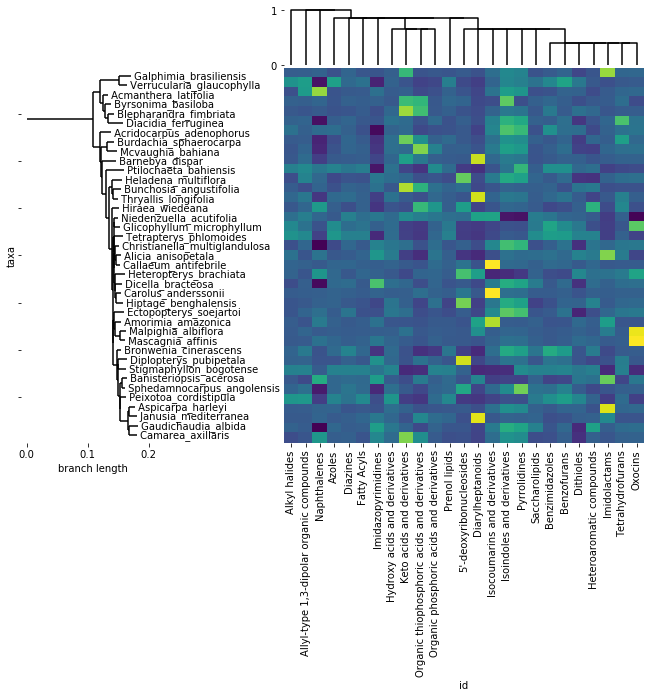

In [5]:
#####NEG

# definitions for the axes
left, width = 0.1, 0.2
bottom, height = 0.1, 0.65
spacing = 0.005


rect_dendoy = [left, bottom, width, height]
rect_dendox = [left+width+spacing+0.16, bottom + height + spacing, 0.5, 0.1]
rect_heatmap = [left + width + spacing +0.16, bottom, 0.5, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes(rect_heatmap)
ax_dendox = fig.add_axes(rect_dendox)#, sharex=ax)
ax_dendoy = fig.add_axes(rect_dendoy)#, sharey=ax)


# no labels
ax_dendox.tick_params(axis="x", labelbottom=False)
ax_dendoy.tick_params(axis="y", labelleft=False)
# No frames
ax_dendox.set_axis_off
ax_dendoy.set_axis_off
ax_dendox.set_frame_on(False)
ax_dendoy.set_frame_on(False)


sns.heatmap(df_norm_column_row_neg, yticklabels=0,ax=ax,
            cmap = 'viridis',
            cbar=False)
dendrogram(Y_neg, orientation="top", labels=canopus.index, ax=ax_dendox, 
           no_labels=True, color_threshold=0, above_threshold_color='k')
Phylo.draw(tree, axes=ax_dendoy, do_show=False)

plt.rc('pdf', fonttype='42')
plt.tight_layout()

# plt.show()
plt.savefig('/Users/helenarusso/Downloads/malpigh_NEG_class.pdf')


/Users/helenarusso/opt/miniconda3/envs/qiime2-2020.2/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


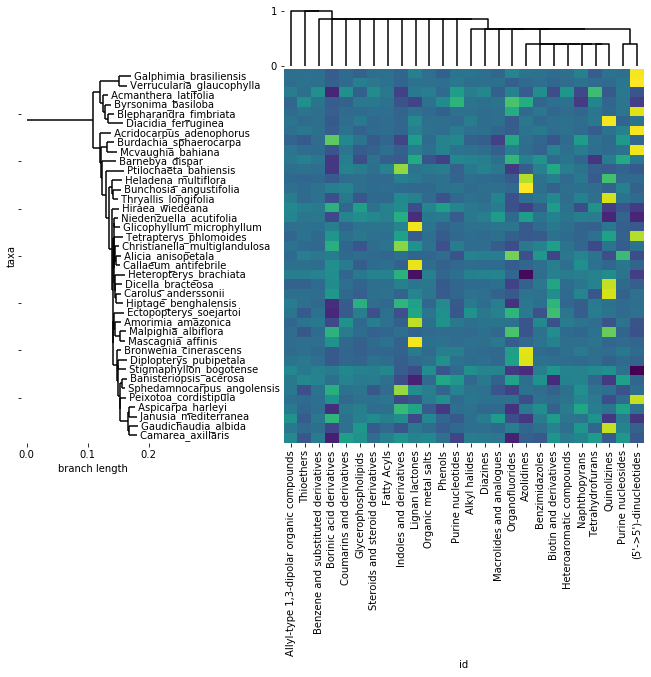

In [6]:
#####POS

# definitions for the axes
left, width = 0.1, 0.2
bottom, height = 0.1, 0.65
spacing = 0.005


rect_dendoy = [left, bottom, width, height]
rect_dendox = [left+width+spacing+0.16, bottom + height + spacing, 0.5, 0.1]
rect_heatmap = [left + width + spacing +0.16, bottom, 0.5, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes(rect_heatmap)
ax_dendox = fig.add_axes(rect_dendox)#, sharex=ax)
ax_dendoy = fig.add_axes(rect_dendoy)#, sharey=ax)


# no labels
ax_dendox.tick_params(axis="x", labelbottom=False)
ax_dendoy.tick_params(axis="y", labelleft=False)
# No frames
ax_dendox.set_axis_off
ax_dendoy.set_axis_off
ax_dendox.set_frame_on(False)
ax_dendoy.set_frame_on(False)


sns.heatmap(df_norm_column_row_pos, yticklabels=0,ax=ax,
            cmap = 'viridis',
            cbar=False)
dendrogram(Y_pos, orientation="top", labels=canopus.index, ax=ax_dendox, 
           no_labels=True, color_threshold=0, above_threshold_color='k')
Phylo.draw(tree, axes=ax_dendoy, do_show=False)

plt.rc('pdf', fonttype='42')
plt.tight_layout()

# plt.show()
plt.savefig('/Users/helenarusso/Downloads/malpigh_POS_class.pdf')
